In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
from uncertainties import ufloat
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)
from scipy.optimize import curve_fit
import scipy.constants as c
from scipy.signal import find_peaks
import matplotlib.image as mpimg

Vorbereitende Messungen

1) 1-12 Zylinder der Länge 50mm, Frequenzspektrum von 0,1kHz bis 12kHz in 10Hz Schritten
Für 12 Zylinder ist nur ein Bild gespeichert worden :(


In [21]:
f_1_zyli, p_1_zyli = np.genfromtxt("Vorbereitungsmessungen/1_Zylinder.dat", unpack=True)
f_2_zyli, p_2_zyli = np.genfromtxt("Vorbereitungsmessungen/2_Zylinder.dat", unpack=True)
f_3_zyli, p_3_zyli = np.genfromtxt("Vorbereitungsmessungen/3_Zylinder.dat", unpack=True)
f_4_zyli, p_4_zyli = np.genfromtxt("Vorbereitungsmessungen/4_Zylinder.dat", unpack=True)
f_5_zyli, p_5_zyli = np.genfromtxt("Vorbereitungsmessungen/5_Zylinder.dat", unpack=True)
f_6_zyli, p_6_zyli = np.genfromtxt("Vorbereitungsmessungen/6_Zylinder.dat", unpack=True)
f_7_zyli, p_7_zyli = np.genfromtxt("Vorbereitungsmessungen/7_Zylinder.dat", unpack=True)
f_8_zyli, p_8_zyli = np.genfromtxt("Vorbereitungsmessungen/8_Zylinder.dat", unpack=True)
f_9_zyli, p_9_zyli = np.genfromtxt("Vorbereitungsmessungen/9_Zylinder.dat", unpack=True)
f_10_zyli, p_10_zyli = np.genfromtxt("Vorbereitungsmessungen/10_Zylinder.dat", unpack=True)
f_11_zyli, p_11_zyli = np.genfromtxt("Vorbereitungsmessungen/11_Zylinder.dat", unpack=True)

def alpha_to_theta(alpha):
    return np.arccos(0.5*np.cos(alpha*np.pi/180) - 0.5)

<IPython.core.display.Javascript object>


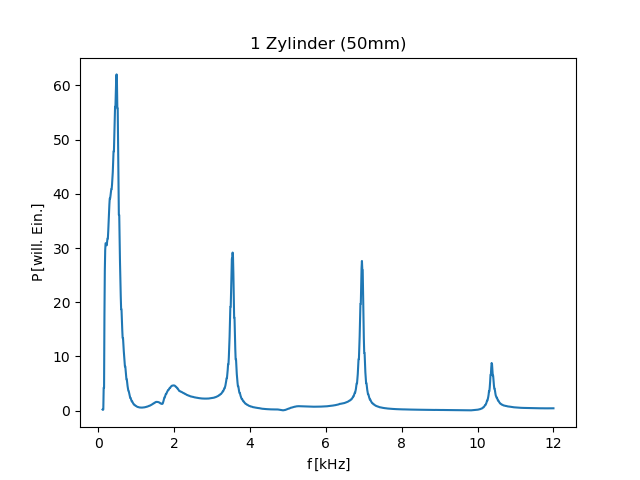

<IPython.core.display.Javascript object>


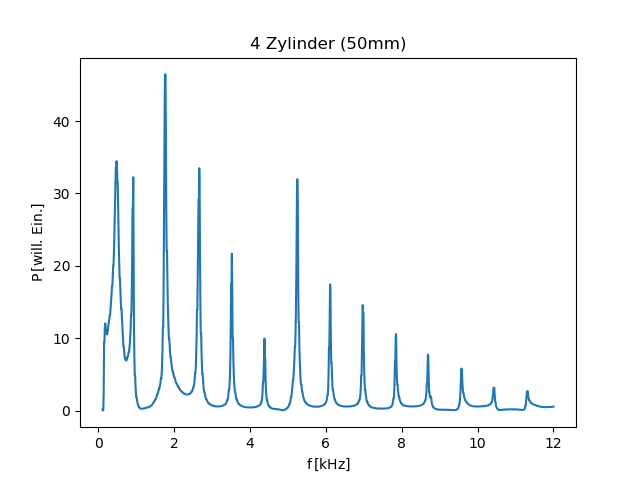

<IPython.core.display.Javascript object>


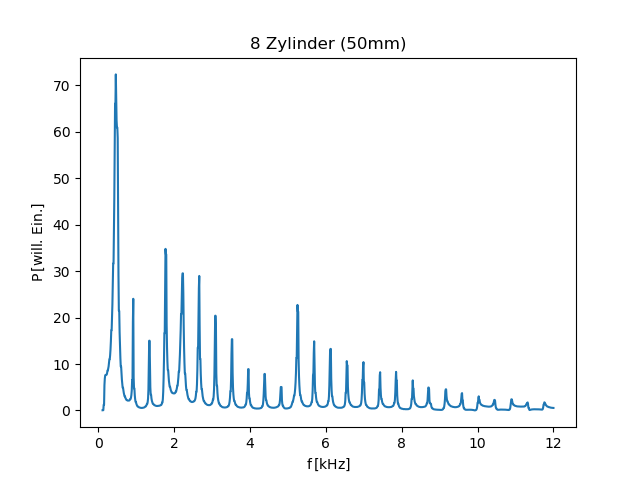

In [22]:
img_1 = mpimg.imread("Vorbereitungsmessungen/1_Zylinder.jpg")
img_4 = mpimg.imread("Vorbereitungsmessungen/4_Zylinder.jpg")
img_8 = mpimg.imread("Vorbereitungsmessungen/8_Zylinder.jpg")



fig, axs = plt.subplots(1, 1)
axs.set_title("1 Zylinder (50mm)")
axs.plot(f_1_zyli*10**(-3), p_1_zyli, "-", label="1 Zylinder (50mm)")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')
#axs[0, 0].legend(loc="best")
#axs[0, 1].imshow(img_1)
#axs[0, 1].set_axis_off

plt.savefig("1_Zylinder_50mm.pdf")
#plt.clf()


fig, axs = plt.subplots(1, 1)
axs.set_title("4 Zylinder (50mm)")
axs.plot(f_4_zyli*10**(-3), p_4_zyli, "-", label="4 Zylinder (50mm)")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("4_Zylinder_50mm.pdf")
#plt.clf()
#axs[1, 0].legend(loc="best")
#axs[1, 1].imshow(img_4)
#axs[1, 1].set_axis_off
#axs[2].set_title("10 Zylinder (50mm)")


fig, axs = plt.subplots(1, 1)
axs.set_title("8 Zylinder (50mm)")
axs.plot(f_8_zyli*10**(-3), p_8_zyli, "-", label="8 Zylinder (50mm)")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("8_Zylinder_50mm.pdf")
#plt.clf()

#axs[2, 0].legend(loc="best")
#axs[2, 1].set_axis_off
#axs[2, 1].imshow(img_8)



Frequenzspektrum eines einzelnen 75mm Zylinders


In [16]:
f_zyli_75, p_zyli_75 = np.genfromtxt("Vorbereitungsmessungen/1_Zylinder_75mm.dat", unpack=True)

<IPython.core.display.Javascript object>


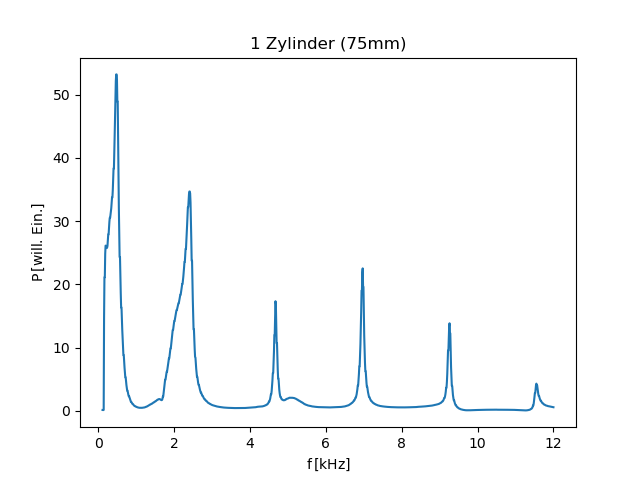

In [17]:
fig, axs = plt.subplots(1, 1)
axs.set_title("1 Zylinder (75mm)")
axs.plot(f_zyli_75*10**(-3), p_zyli_75, "-", label="8 Zylinder (50mm)")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1_Zylinder_75mm.pdf")
#plt.clf()

Wasserstoffatom


Hochaufgelöstes Spektrum 5-Hz-Schritte 60ms/Schritte alpha=180°, 100Hz-12000Hz

<IPython.core.display.Javascript object>


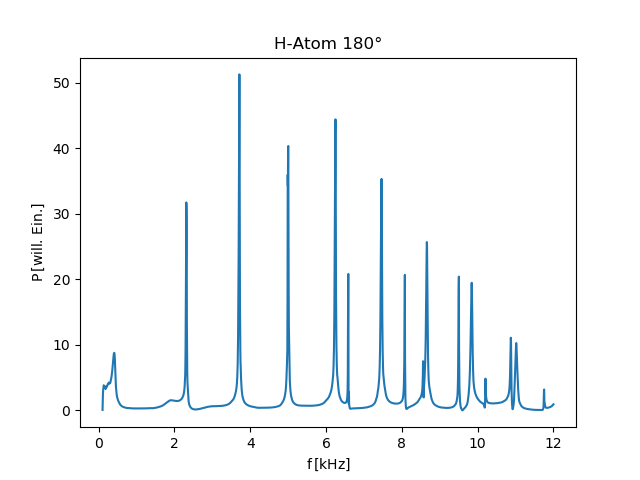

In [23]:
f_180_hatom, p_180_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_1/180_Grad.dat", unpack=True)

fig, axs = plt.subplots(1, 1)
axs.set_title("H-Atom 180°")
axs.plot(f_180_hatom*10**(-3), p_180_hatom, "-", label="H-Atom 180°")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("hatom_180.pdf")

Resonanzfrequenzen (Aufgabe 2) 100Hz bis 10000Hz

Werte sind im Praktikumsbuch und werden direkt in LATEX als Tabelle dargestellt

Polarplots (Aufgabe 3) Für 4 Resonanzen P(alpha), mit 0° bis 180° in 5°-Schritten

In [24]:
f_0_hatom, p_0_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/0_grad.dat", unpack=True)
f_10_hatom, p_10_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/10_grad.dat", unpack=True)
f_20_hatom, p_20_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/20_grad.dat", unpack=True)
f_30_hatom, p_30_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/30_grad.dat", unpack=True)
f_40_hatom, p_40_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/40_grad.dat", unpack=True)
f_50_hatom, p_50_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/50_grad.dat", unpack=True)
f_60_hatom, p_60_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/60_grad.dat", unpack=True)
f_70_hatom, p_70_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/70_grad.dat", unpack=True)
f_80_hatom, p_80_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/80_grad.dat", unpack=True)
f_90_hatom, p_90_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/90_grad.dat", unpack=True)
f_100_hatom, p_100_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/100_grad.dat", unpack=True)
f_110_hatom, p_110_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/110_grad.dat", unpack=True)
f_120_hatom, p_120_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/120_grad.dat", unpack=True)
f_130_hatom, p_130_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/130_grad.dat", unpack=True)
f_140_hatom, p_140_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/140_grad.dat", unpack=True)
f_150_hatom, p_150_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/150_grad.dat", unpack=True)
f_160_hatom, p_160_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/160_grad.dat", unpack=True)
f_170_hatom, p_170_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/170_grad.dat", unpack=True)
f_180_hatom, p_180_hatom = np.genfromtxt("Wasserstoffatom/Aufgabe_3/180_grad.dat", unpack=True)

<IPython.core.display.Javascript object>


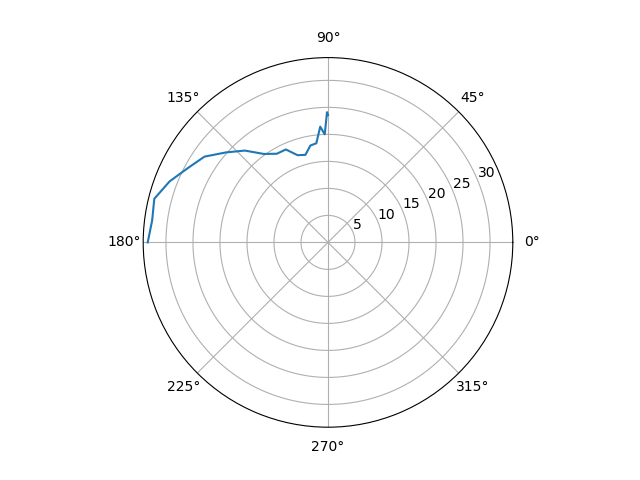

In [26]:
alpha = alpha_to_theta(np.arange(0, 190, 10))
res_1 = find_peaks(p_0_hatom, 10)[1]['peak_heights'][0]
res_1 = np.append(res_1, find_peaks(p_10_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_20_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_30_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_40_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_50_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_60_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_70_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_80_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_90_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_100_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_110_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_120_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_130_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_140_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_150_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_160_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_170_hatom, 10)[1]['peak_heights'][0])
res_1 = np.append(res_1, find_peaks(p_180_hatom, 10)[1]['peak_heights'][0])

#print(alpha)

fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Atom 1. Resonanz")
axs.plot(alpha, res_1)
plt.savefig("H_atom_resonanz_1_2310Hz.pdf")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')



<IPython.core.display.Javascript object>


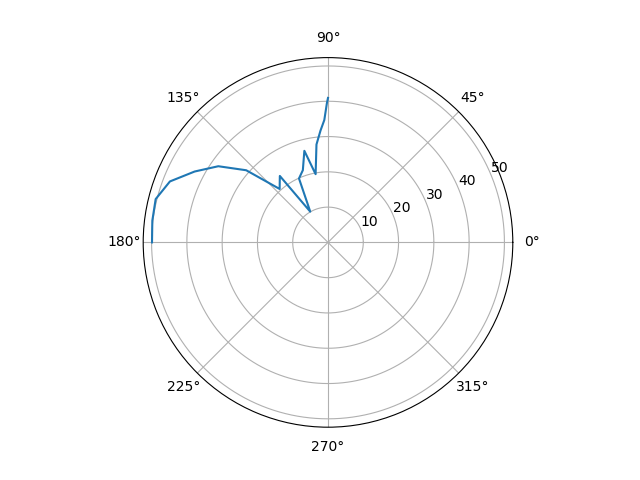

In [27]:
res_2 = find_peaks(p_0_hatom, 10)[1]['peak_heights'][1]
res_2 = np.append(res_2, find_peaks(p_10_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_20_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_30_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_40_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_50_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_60_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_70_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_80_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_90_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_100_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_110_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_120_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_130_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_140_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_150_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_160_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_170_hatom, 10)[1]['peak_heights'][1])
res_2 = np.append(res_2, find_peaks(p_180_hatom, 10)[1]['peak_heights'][1])

#print(res_2)

fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Atom 1. Resonanz")
axs.plot(alpha, res_2)
plt.savefig("H_atom_resonanz_2_3711Hz.pdf")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

[ 9.721  9.035  9.669 10.492 10.777 26.991 13.304 14.763 16.172 15.659
 15.832 14.389 13.894 14.442 20.31  30.096 30.612 38.903 38.766]


<IPython.core.display.Javascript object>


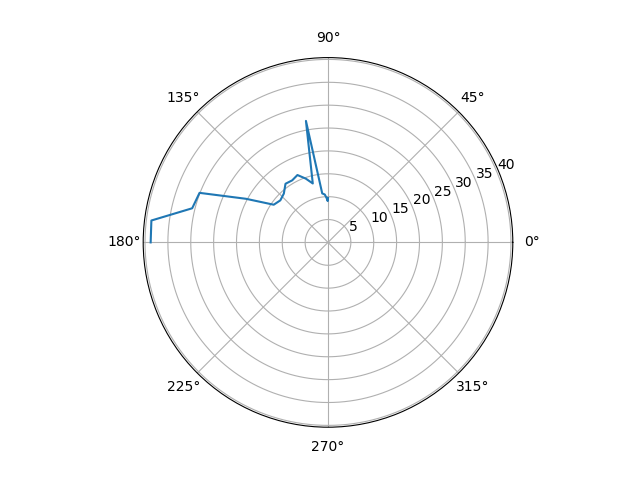

In [28]:
res_3 = find_peaks(p_0_hatom, 8.6)[1]['peak_heights'][2]
res_3 = np.append(res_3, find_peaks(p_10_hatom, 8.6)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_20_hatom, 8.6)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_30_hatom, 8.6)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_40_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_50_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_60_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_70_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_80_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_90_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_100_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_110_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_120_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_130_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_140_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_150_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_160_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_170_hatom, 10)[1]['peak_heights'][2])
res_3 = np.append(res_3, find_peaks(p_180_hatom, 10)[1]['peak_heights'][2])

print(res_3)

fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Atom 1. Resonanz")
axs.plot(alpha, res_3)
plt.savefig("H_atom_resonanz_3_4999Hz.pdf")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

[ 2.042  1.575  4.615  6.513  9.757 13.305 15.791 15.762 12.949  5.821
  4.498 14.777 20.164 19.53   9.551  8.307 24.9   33.442 35.433]


<IPython.core.display.Javascript object>


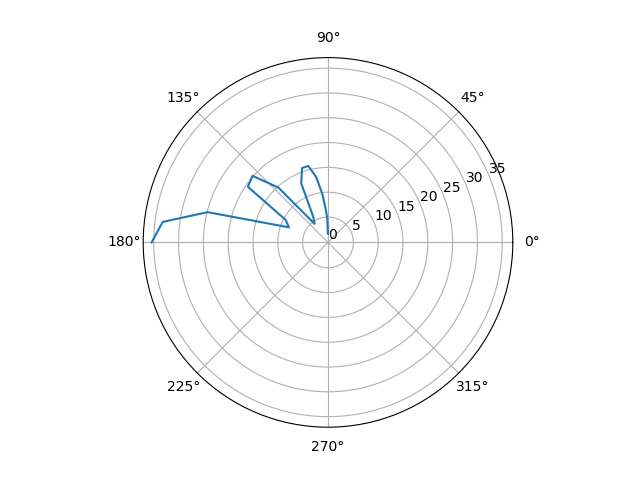

In [29]:
res_4 = find_peaks(p_0_hatom, 1.5)[1]['peak_heights'][19]
res_4 = np.append(res_4, find_peaks(p_10_hatom, 1.5)[1]['peak_heights'][18])
res_4 = np.append(res_4, find_peaks(p_20_hatom, 1.5)[1]['peak_heights'][15])
res_4 = np.append(res_4, find_peaks(p_30_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_40_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_50_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_60_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_70_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_80_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_90_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_100_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_110_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_120_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_130_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_140_hatom, 1.5, distance=80)[1]['peak_heights'][5])
res_4 = np.append(res_4, find_peaks(p_150_hatom, 1.5, distance=80)[1]['peak_heights'][6])
res_4 = np.append(res_4, find_peaks(p_160_hatom, 1.5, distance=80)[1]['peak_heights'][6])
res_4 = np.append(res_4, find_peaks(p_170_hatom, 1.5, distance=80)[1]['peak_heights'][6])
res_4 = np.append(res_4, find_peaks(p_180_hatom, 1.5, distance=80)[1]['peak_heights'][6])

print(res_4)

fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Atom 1. Resonanz")
axs.plot(alpha, res_4)
plt.savefig("H_atom_resonanz_4_7470Hz.pdf")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

In [81]:
#fig, axs = plt.subplots(1, 1)
#axs.set_title("H-Atom 180°")
#axs.plot(f_50_hatom*10**(-3), p_50_hatom, "-", label="H-Atom 180°")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

<IPython.core.display.Javascript object>


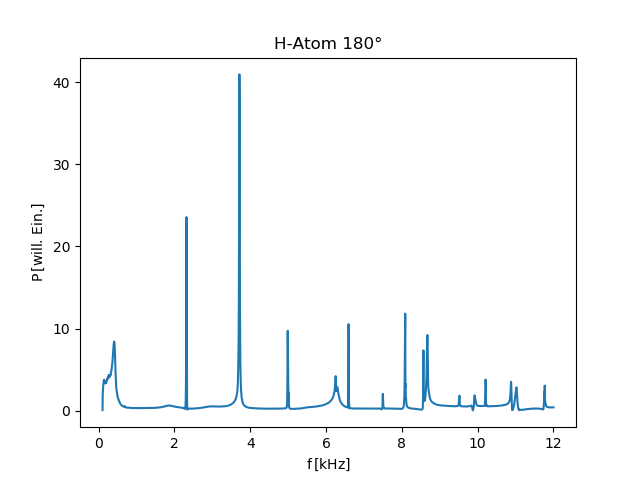

Text(0, 0.5, 'P$\\,$[will. Ein.]')

In [30]:
fig, axs = plt.subplots(1, 1)
axs.set_title("H-Atom 180°")
axs.plot(f_0_hatom*10**(-3), p_0_hatom, "-", label="H-Atom 180°")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

Zwischenringe (3mm, 9mm, 12mm) in Atom (Aufgabe 4): Aufspaltung der Resonanz bei 2300Hz untersuchen. P(f) mit 1800Hz bis 2600Hz in 1Hz-Schritten 

Aus Frequenzspektrum Aufspaltung der Peaks ermitteln und diese gegen die DIcke der Ringe aufteilen

63.0


<IPython.core.display.Javascript object>


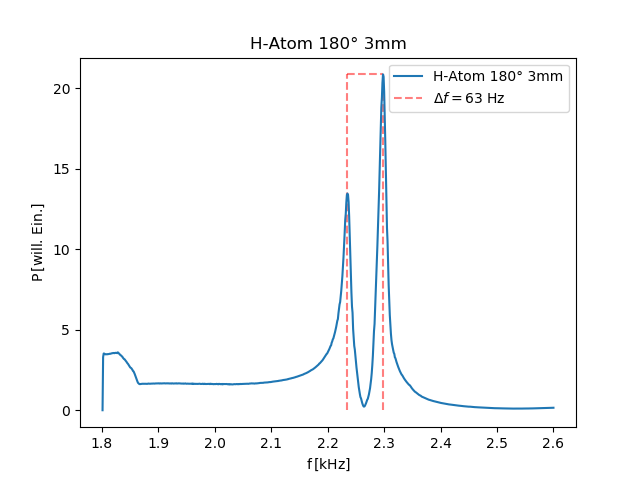

In [31]:
f_180_hatom_3mm, p_180_hatom_3mm = np.genfromtxt("Wasserstoffatom/Aufgabe_4/180_grad_3mm.dat", unpack=True)

a_180_hatom_3mm = f_180_hatom_3mm[find_peaks(p_180_hatom_3mm, 10)[0][1]] - f_180_hatom_3mm[find_peaks(p_180_hatom_3mm, 10)[0][0]]
print(a_180_hatom_3mm)
#print(find_peaks(p_180_hatom_3mm,10)[0][0])


fig, axs = plt.subplots(1, 1)
axs.set_title("H-Atom 180° 3mm")
axs.plot(f_180_hatom_3mm*10**(-3), p_180_hatom_3mm, "-", label="H-Atom 180° 3mm")
axs.hlines(p_180_hatom_3mm.max(), f_180_hatom_3mm[find_peaks(p_180_hatom_3mm, 10)[0][0]]*10**(-3), f_180_hatom_3mm[find_peaks(p_180_hatom_3mm, 10)[0][1]]*10**(-3), colors="red", linestyles="dashed", alpha=0.5, label="$\Delta f = 63$ Hz")
axs.vlines(f_180_hatom_3mm[find_peaks(p_180_hatom_3mm, 10)[0][1]]*10**(-3), 0, p_180_hatom_3mm.max(), colors="red", linestyles="dashed", alpha=0.5)
axs.vlines(f_180_hatom_3mm[find_peaks(p_180_hatom_3mm, 10)[0][0]]*10**(-3), 0, p_180_hatom_3mm.max(), colors="red", linestyles="dashed", alpha=0.5)
axs.legend(loc="best")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')


plt.savefig("hatom_180_3mm.pdf")

112.0


<IPython.core.display.Javascript object>


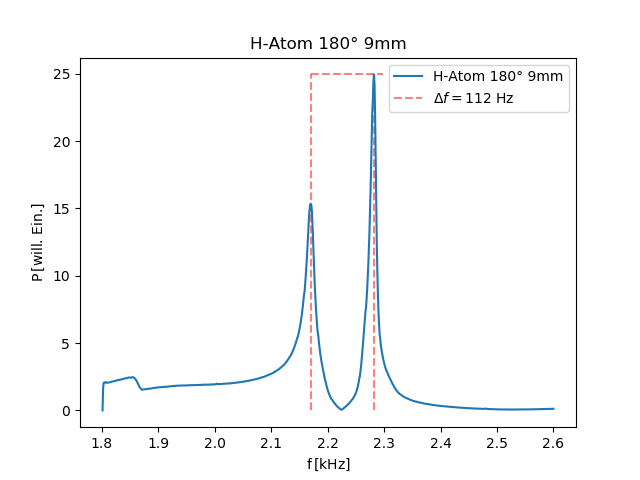

In [89]:
f_180_hatom_9mm, p_180_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_4/180_grad_9mm.dat", unpack=True)

a_180_hatom_9mm = f_180_hatom_9mm[find_peaks(p_180_hatom_9mm, 10)[0][1]] - f_180_hatom_9mm[find_peaks(p_180_hatom_9mm, 10)[0][0]]
print(a_180_hatom_9mm)

fig, axs = plt.subplots(1, 1)
axs.set_title("H-Atom 180° 9mm")
axs.plot(f_180_hatom_9mm*10**(-3), p_180_hatom_9mm, "-", label="H-Atom 180° 9mm")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')
axs.hlines(p_180_hatom_9mm.max(), f_180_hatom_9mm[find_peaks(p_180_hatom_9mm, 10)[0][0]]*10**(-3), f_180_hatom_9mm[find_peaks(p_180_hatom_3mm, 10)[0][1]]*10**(-3), colors="red", linestyles="dashed", alpha=0.5, label="$\Delta f = 112$ Hz")
axs.vlines(f_180_hatom_9mm[find_peaks(p_180_hatom_9mm, 10)[0][1]]*10**(-3), 0, p_180_hatom_9mm.max(), colors="red", linestyles="dashed", alpha=0.5)
axs.vlines(f_180_hatom_9mm[find_peaks(p_180_hatom_9mm, 10)[0][0]]*10**(-3), 0, p_180_hatom_9mm.max(), colors="red", linestyles="dashed", alpha=0.5)
axs.legend(loc="best")

plt.savefig("hatom_180_9mm.pdf")

171.0


<IPython.core.display.Javascript object>


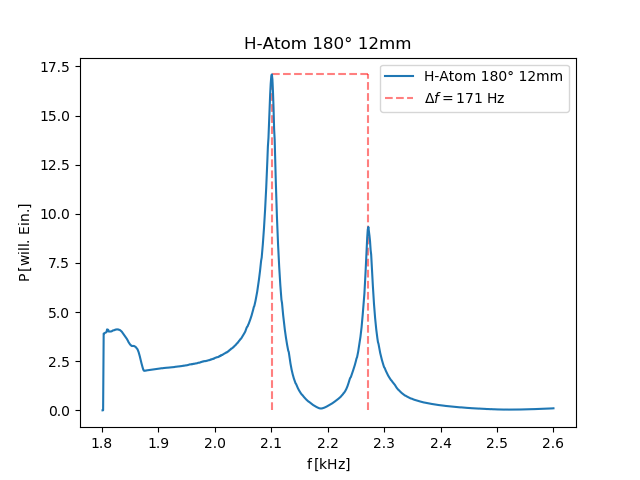

In [32]:
f_180_hatom_12mm, p_180_hatom_12mm = np.genfromtxt("Wasserstoffatom/Aufgabe_4/180_grad_12mm.dat", unpack=True)

a_180_hatom_12mm = f_180_hatom_12mm[find_peaks(p_180_hatom_12mm, 5)[0][1]] - f_180_hatom_12mm[find_peaks(p_180_hatom_12mm, 5)[0][0]]
print(a_180_hatom_12mm)

fig, axs = plt.subplots(1, 1)
axs.set_title("H-Atom 180° 12mm")
axs.plot(f_180_hatom_12mm*10**(-3), p_180_hatom_12mm, "-", label="H-Atom 180° 12mm")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')
axs.hlines(p_180_hatom_12mm.max(), f_180_hatom_12mm[find_peaks(p_180_hatom_12mm, 5)[0][0]]*10**(-3), f_180_hatom_12mm[find_peaks(p_180_hatom_12mm, 5)[0][1]]*10**(-3), colors="red", linestyles="dashed", alpha=0.5, label="$\Delta f = 171$ Hz")
axs.vlines(f_180_hatom_12mm[find_peaks(p_180_hatom_12mm, 5)[0][1]]*10**(-3), 0, p_180_hatom_12mm.max(), colors="red", linestyles="dashed", alpha=0.5)
axs.vlines(f_180_hatom_12mm[find_peaks(p_180_hatom_12mm, 5)[0][0]]*10**(-3), 0, p_180_hatom_12mm.max(), colors="red", linestyles="dashed", alpha=0.5)
axs.legend(loc="best")

plt.savefig("hatom_180_12mm.pdf")

<IPython.core.display.Javascript object>


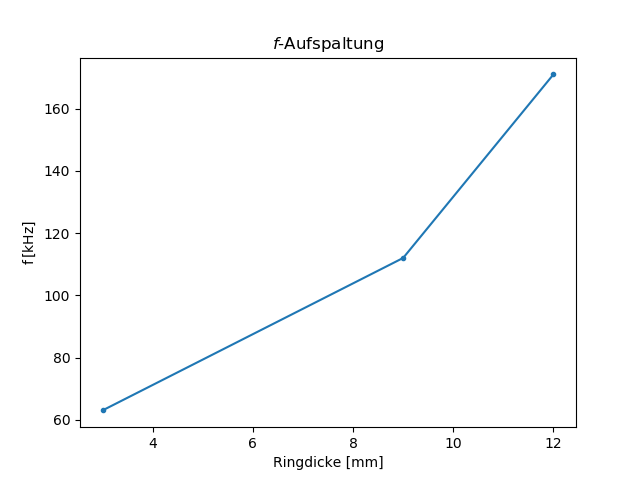

In [90]:
ringdicke = np.array([3, 9, 12])
abstaende = np.array([a_180_hatom_3mm, a_180_hatom_9mm, a_180_hatom_12mm])
fig, axs = plt.subplots(1, 1)
axs.set_title("$f$-Aufspaltung")
axs.plot(ringdicke, abstaende, ".-", label="H-Atom 180°")
axs.set_ylabel(r'f$\,$[kHz]')
axs.set_xlabel(r'Ringdicke [mm]')

plt.savefig("f_Aufspaltung.pdf")

9mm Zwischenring in Atom. P(alpha) 0° bis 180° in 10° Schritten für jeden Winkel P(f) mit 1800Hz bis 2600Hz in 1Hz-Schritten. Zu welchen Quantenzahlen  (l und m) gehören die Resonanzen?

In [33]:
f_0_hatom_9mm, p_0_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/0_grad_9mm.dat", unpack=True)
f_10_hatom_9mm, p_10_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/10_grad_9mm.dat", unpack=True)
f_20_hatom_9mm, p_20_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/20_grad_9mm.dat", unpack=True)
f_30_hatom_9mm, p_30_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/30_grad_9mm.dat", unpack=True)
f_40_hatom_9mm, p_40_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/40_grad_9mm.dat", unpack=True)
f_50_hatom_9mm, p_50_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/50_grad_9mm.dat", unpack=True)
f_60_hatom_9mm, p_60_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/60_grad_9mm.dat", unpack=True)
f_70_hatom_9mm, p_70_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/70_grad_9mm.dat", unpack=True)
f_80_hatom_9mm, p_80_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/80_grad_9mm.dat", unpack=True)
f_90_hatom_9mm, p_90_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/90_grad_9mm.dat", unpack=True)
f_100_hatom_9mm, p_100_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/100_grad_9mm.dat", unpack=True)
f_110_hatom_9mm, p_110_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/110_grad_9mm.dat", unpack=True)
f_120_hatom_9mm, p_120_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/120_grad_9mm.dat", unpack=True)
f_130_hatom_9mm, p_130_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/130_grad_9mm.dat", unpack=True)
f_140_hatom_9mm, p_140_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/140_grad_9mm.dat", unpack=True)
f_150_hatom_9mm, p_150_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/150_grad_9mm.dat", unpack=True)
f_160_hatom_9mm, p_160_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/160_grad_9mm.dat", unpack=True)
f_170_hatom_9mm, p_170_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/170_grad_9mm.dat", unpack=True)
f_180_hatom_9mm, p_180_hatom_9mm = np.genfromtxt("Wasserstoffatom/Aufgabe_5/180_grad_9mm.dat", unpack=True)

<IPython.core.display.Javascript object>


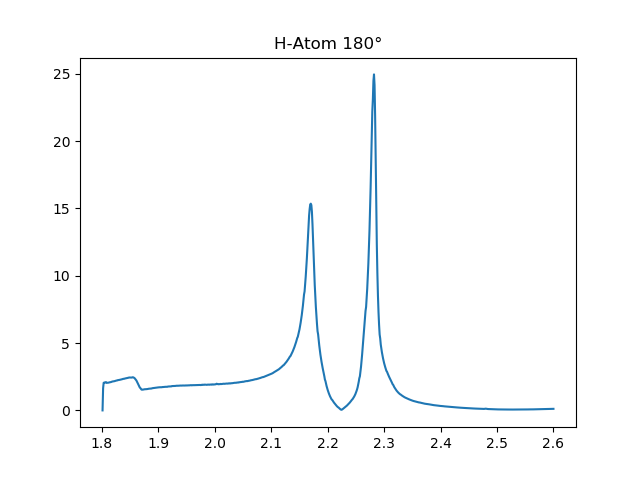

In [34]:
fig, axs = plt.subplots(1, 1)
axs.set_title("H-Atom 180°")
axs.plot(f_180_hatom_9mm*10**(-3), p_180_hatom_9mm, "-", label="H-Atom 180°")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

<IPython.core.display.Javascript object>


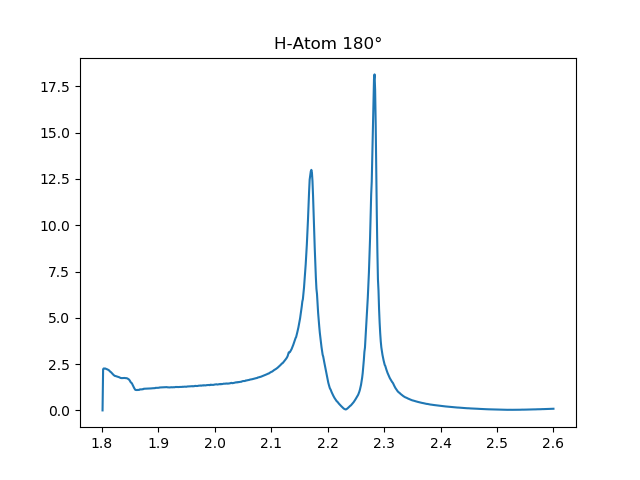

In [17]:
fig, axs = plt.subplots(1, 1)
axs.set_title("H-Atom 180°")
axs.plot(f_140_hatom_9mm*10**(-3), p_140_hatom_9mm, "-", label="H-Atom 180°")

In [35]:
aufspaltung = f_0_hatom_9mm[find_peaks(p_0_hatom_9mm, 10)[0][1]] - f_0_hatom_9mm[find_peaks(p_0_hatom_9mm, 10)[0][0]]
aufspaltung = np.append(aufspaltung, f_10_hatom_9mm[find_peaks(p_10_hatom_9mm, 10)[0][1]] - f_10_hatom_9mm[find_peaks(p_10_hatom_9mm, 10)[0][0]])
aufspaltung = np.append(aufspaltung, f_20_hatom_9mm[find_peaks(p_20_hatom_9mm, 10)[0][1]] - f_20_hatom_9mm[find_peaks(p_20_hatom_9mm, 10)[0][0]])
aufspaltung = np.append(aufspaltung, f_30_hatom_9mm[find_peaks(p_30_hatom_9mm, 10)[0][1]] - f_30_hatom_9mm[find_peaks(p_30_hatom_9mm, 10)[0][0]])
aufspaltung = np.append(aufspaltung, f_40_hatom_9mm[find_peaks(p_40_hatom_9mm, 10)[0][1]] - f_40_hatom_9mm[find_peaks(p_40_hatom_9mm, 10)[0][0]])
aufspaltung = np.append(aufspaltung, f_50_hatom_9mm[find_peaks(p_50_hatom_9mm, 8)[0][1]] - f_50_hatom_9mm[find_peaks(p_50_hatom_9mm, 8)[0][0]])
aufspaltung = np.append(aufspaltung, f_60_hatom_9mm[find_peaks(p_60_hatom_9mm, 2)[0][1]] - f_60_hatom_9mm[find_peaks(p_60_hatom_9mm, 2)[0][0]])
aufspaltung = np.append(aufspaltung, f_70_hatom_9mm[find_peaks(p_70_hatom_9mm, 2)[0][1]] - f_70_hatom_9mm[find_peaks(p_70_hatom_9mm, 2)[0][0]])
aufspaltung = np.append(aufspaltung, f_80_hatom_9mm[find_peaks(p_80_hatom_9mm, 2)[0][1]] - f_80_hatom_9mm[find_peaks(p_80_hatom_9mm, 2)[0][0]])
aufspaltung = np.append(aufspaltung, f_90_hatom_9mm[find_peaks(p_90_hatom_9mm, 2)[0][1]] - f_90_hatom_9mm[find_peaks(p_90_hatom_9mm, 2)[0][0]])
aufspaltung = np.append(aufspaltung, f_100_hatom_9mm[find_peaks(p_100_hatom_9mm)[0][1]] - f_100_hatom_9mm[find_peaks(p_100_hatom_9mm)[0][0]])
aufspaltung = np.append(aufspaltung, f_110_hatom_9mm[find_peaks(p_110_hatom_9mm, 4)[0][1]] - f_110_hatom_9mm[find_peaks(p_110_hatom_9mm, 4)[0][0]])
aufspaltung = np.append(aufspaltung, f_120_hatom_9mm[find_peaks(p_120_hatom_9mm, 4)[0][1]] - f_120_hatom_9mm[find_peaks(p_120_hatom_9mm, 4)[0][0]])
aufspaltung = np.append(aufspaltung, f_130_hatom_9mm[find_peaks(p_130_hatom_9mm, 4)[0][1]] - f_130_hatom_9mm[find_peaks(p_130_hatom_9mm, 4)[0][0]])
aufspaltung = np.append(aufspaltung, f_140_hatom_9mm[find_peaks(p_140_hatom_9mm, 4)[0][1]] - f_140_hatom_9mm[find_peaks(p_140_hatom_9mm, 4)[0][0]])
aufspaltung = np.append(aufspaltung, f_150_hatom_9mm[find_peaks(p_150_hatom_9mm, 10)[0][1]] - f_150_hatom_9mm[find_peaks(p_150_hatom_9mm, 10)[0][0]])
aufspaltung = np.append(aufspaltung, f_160_hatom_9mm[find_peaks(p_160_hatom_9mm, 10)[0][1]] - f_160_hatom_9mm[find_peaks(p_160_hatom_9mm, 10)[0][0]])
aufspaltung = np.append(aufspaltung, f_170_hatom_9mm[find_peaks(p_170_hatom_9mm, 10)[0][1]] - f_170_hatom_9mm[find_peaks(p_170_hatom_9mm, 10)[0][0]])
aufspaltung = np.append(aufspaltung, f_180_hatom_9mm[find_peaks(p_180_hatom_9mm, 10)[0][1]] - f_180_hatom_9mm[find_peaks(p_180_hatom_9mm, 10)[0][0]])

[112. 111. 111. 111. 111. 112.   5.   4.   3.  28.   6. 114. 112. 112.
 112. 113. 112. 112. 112.]


<IPython.core.display.Javascript object>


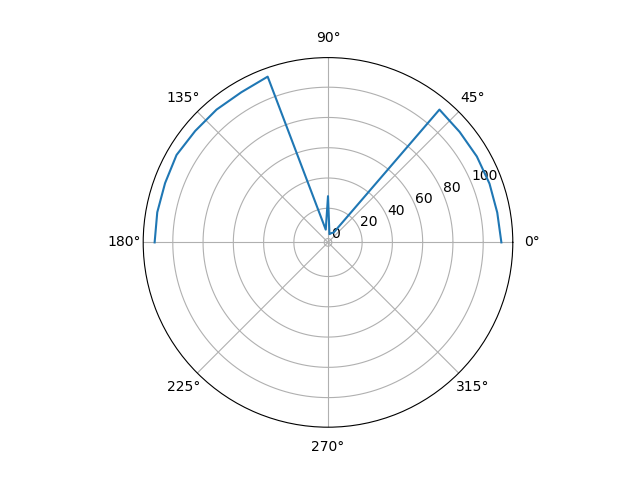

In [36]:
print(aufspaltung)
alpha = np.arange(0, 190, 10)
fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Atom 1. Resonanz")
axs.plot(alpha*np.pi/180, aufspaltung)
plt.savefig("H_atom_resonanz_4.pdf")

Wasserstoff-Molekül (ab hier ist jede Bezeichnung mit Atom eigentlich Molekül)

Resonanzfrequenzen als Abstand des Blendendurchmessers

In [37]:
f_180_hatom_10mm, p_180_hatom_10mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_1/180_grad_10mm.dat", unpack=True)
f_180_hatom_15mm, p_180_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_1/180_grad_15mm.dat", unpack=True)
f_180_hatom_20mm, p_180_hatom_20mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_1/180_grad_20mm.dat", unpack=True)

In [38]:
resonanzen_1 = np.array([f_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][0]], f_180_hatom_15mm[find_peaks(p_180_hatom_15mm, 4)[0][0]], f_180_hatom_20mm[find_peaks(p_180_hatom_20mm, 4)[0][0]]])
resonanzen_2 = np.array([f_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][1]], f_180_hatom_15mm[find_peaks(p_180_hatom_15mm, 4)[0][1]], f_180_hatom_20mm[find_peaks(p_180_hatom_20mm, 4)[0][1]]])
resonanzen_3 = np.array([f_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][2]], f_180_hatom_15mm[find_peaks(p_180_hatom_15mm, 4)[0][2]], f_180_hatom_20mm[find_peaks(p_180_hatom_20mm, 4)[0][2]]])
print(resonanzen_1)

[2305. 2305. 2304.]


<IPython.core.display.Javascript object>


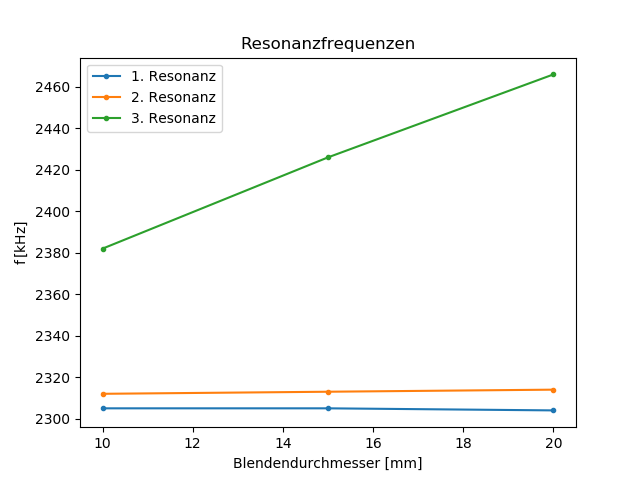

In [39]:
d_blende = np.array([10, 15, 20])

fig, axs = plt.subplots(1, 1)
axs.set_title("Resonanzfrequenzen")
axs.plot(d_blende, resonanzen_1, ".-", label="1. Resonanz")
axs.plot(d_blende, resonanzen_2, ".-", label="2. Resonanz")
axs.plot(d_blende, resonanzen_3, ".-", label="3. Resonanz")
axs.set_ylabel(r'f$\,$[kHz]')
axs.set_xlabel(r'Blendendurchmesser [mm]')
axs.legend(loc="best")

plt.savefig("res_freq_gegen_d_blende.pdf")

<IPython.core.display.Javascript object>


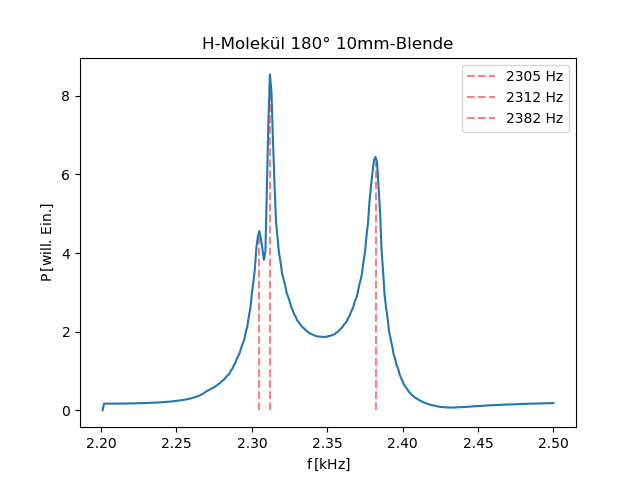

In [23]:
fig, axs = plt.subplots(1, 1)
axs.set_title("H-Molekül 180° 10mm-Blende")
axs.plot(f_180_hatom_10mm*10**(-3), p_180_hatom_10mm, "-") #, label="H-Atom 180°")
axs.vlines(f_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][0]]*10**(-3), 0, p_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][0]], colors="red", linestyles="dashed", alpha=0.5, label="2305 Hz")
axs.vlines(f_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][1]]*10**(-3), 0, p_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][1]], colors="red", linestyles="dashed", alpha=0.5, label="2312 Hz")
axs.vlines(f_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][2]]*10**(-3), 0, p_180_hatom_10mm[find_peaks(p_180_hatom_10mm, 4)[0][2]], colors="red", linestyles="dashed", alpha=0.5, label="2382 Hz")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')
axs.legend(loc="best")
plt.savefig("h_mol_180_10mm_blende")

In [40]:
#fig, axs = plt.subplots(1, 1)
#axs.set_title("H-Atom 180°")
#axs.plot(f_180_hatom_15mm*10**(-3), p_180_hatom_15mm, "-", label="H-Atom 180°")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

In [41]:
#fig, axs = plt.subplots(1, 1)
#axs.set_title("H-Atom 180°")
#axs.plot(f_180_hatom_20mm*10**(-3), p_180_hatom_20mm, "-", label="H-Atom 180°")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

Winkelverteilung der Druckamplituden für 4 Resonanzen, 16mm-Blende

In [42]:
f_0_hatom_15mm, p_0_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/0_grad_15mm.dat", unpack=True)
f_10_hatom_15mm, p_10_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/10_grad_15mm.dat", unpack=True)
f_20_hatom_15mm, p_20_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/20_grad_15mm.dat", unpack=True)
f_30_hatom_15mm, p_30_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/30_grad_15mm.dat", unpack=True)
f_40_hatom_15mm, p_40_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/40_grad_15mm.dat", unpack=True)
f_50_hatom_15mm, p_50_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/50_grad_15mm.dat", unpack=True)
f_60_hatom_15mm, p_60_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/60_grad_15mm.dat", unpack=True)
f_70_hatom_15mm, p_70_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/70_grad_15mm.dat", unpack=True)
f_80_hatom_15mm, p_80_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/80_grad_15mm.dat", unpack=True)
f_90_hatom_15mm, p_90_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/90_grad_15mm.dat", unpack=True)
f_100_hatom_15mm, p_100_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/100_grad_15mm.dat", unpack=True)
f_110_hatom_15mm, p_110_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/110_grad_15mm.dat", unpack=True)
f_120_hatom_15mm, p_120_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/120_grad_15mm.dat", unpack=True)
f_130_hatom_15mm, p_130_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/130_grad_15mm.dat", unpack=True)
f_140_hatom_15mm, p_140_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/140_grad_15mm.dat", unpack=True)
f_150_hatom_15mm, p_150_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/150_grad_15mm.dat", unpack=True)
f_160_hatom_15mm, p_160_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/160_grad_15mm.dat", unpack=True)
f_170_hatom_15mm, p_170_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/170_grad_15mm.dat", unpack=True)
f_180_hatom_15mm, p_180_hatom_15mm = np.genfromtxt("Wasserstoffmolekuel/Aufgabe_2/180_grad_15mm.dat", unpack=True)

[ 9.887 10.628  9.744  9.541  8.762  8.897  8.627  8.252  6.812  7.524
  7.355  6.91   6.675  6.383  6.203  5.93   5.889  5.938  5.729]


<IPython.core.display.Javascript object>


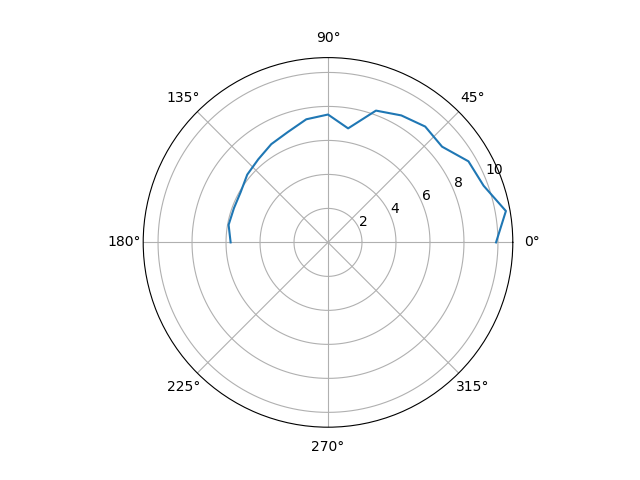

In [43]:
alpha = np.arange(0, 190, 10)

res_11 = find_peaks(p_0_hatom_15mm, 2)[1]['peak_heights'][0]
res_11 = np.append(res_11, find_peaks(p_10_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_20_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_30_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_40_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_50_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_60_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_70_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_80_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_90_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_100_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_110_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_120_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_130_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_140_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_150_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_160_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_170_hatom_15mm, 2)[1]['peak_heights'][0])
res_11 = np.append(res_11, find_peaks(p_180_hatom_15mm, 2)[1]['peak_heights'][0])


print(res_11)

fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Molekül 1. Resonanz")
axs.plot(alpha*np.pi/180, res_11)
plt.savefig("H_mol_resonanz_1_2307Hz.pdf")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')

<IPython.core.display.Javascript object>


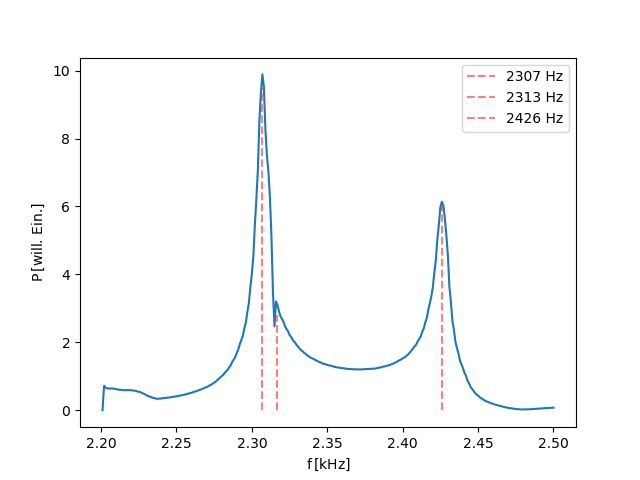

In [110]:
fig, axs = plt.subplots(1, 1)
#axs.set_title("H-Atom 180°")
axs.plot(f_0_hatom_15mm*10**(-3), p_0_hatom_15mm, "-")
axs.vlines(2.307, 0, 9.5, colors="red", linestyles="dashed", alpha=0.5, label="2307 Hz")
axs.vlines(2.317, 0, 2.8, colors="red", linestyles="dashed", alpha=0.5, label="2313 Hz")
axs.vlines(2.426, 0, 6, colors="red", linestyles="dashed", alpha=0.5, label="2426 Hz")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')
axs.legend(loc="best")
plt.savefig("hmol_res.pdf")

<IPython.core.display.Javascript object>


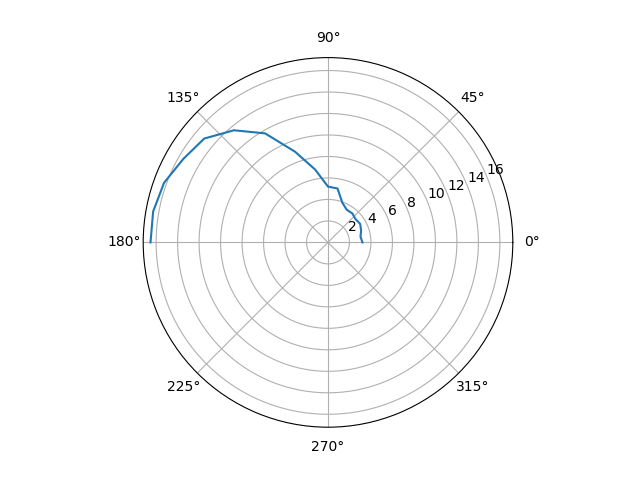

[ 3.208  3.071  3.282  3.454  3.357  3.52   3.503  3.918  5.098  5.193
  6.885  8.989 11.72  13.625 15.039 15.549 16.239 16.53  16.522]


In [44]:
res_21 = find_peaks(p_0_hatom_15mm, 2)[1]['peak_heights'][1]
res_21 = np.append(res_21, find_peaks(p_10_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_20_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_30_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_40_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_50_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_60_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_70_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_80_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_90_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_100_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_110_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_120_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_130_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_140_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_150_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_160_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_170_hatom_15mm, 2)[1]['peak_heights'][1])
res_21 = np.append(res_21, find_peaks(p_180_hatom_15mm, 2)[1]['peak_heights'][1])



fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Molekül 1. Resonanz")
axs.plot(alpha*np.pi/180, res_21)
plt.savefig("H_mol_resonanz_1_2313Hz.pdf")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')


print(res_21)

<IPython.core.display.Javascript object>


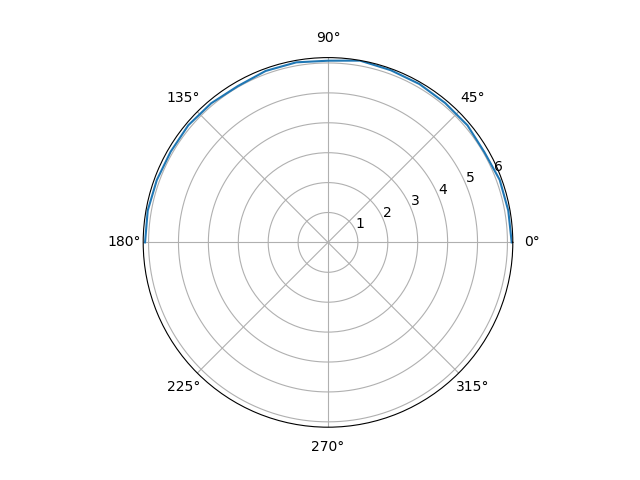

[6.142 6.121 6.11  6.037 6.088 6.088 6.114 6.128 6.172 6.075 6.113 6.1
 6.033 6.074 6.096 6.073 6.092 6.121 6.117]


In [101]:
res_31 = find_peaks(p_0_hatom_15mm, 2)[1]['peak_heights'][2]
res_31 = np.append(res_31, find_peaks(p_10_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_20_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_30_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_40_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_50_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_60_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_70_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_80_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_90_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_100_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_110_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_120_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_130_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_140_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_150_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_160_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_170_hatom_15mm, 2)[1]['peak_heights'][2])
res_31 = np.append(res_31, find_peaks(p_180_hatom_15mm, 2)[1]['peak_heights'][2])


fig, axs = plt.subplots(subplot_kw={'projection': 'polar'})
#axs.set_title("H-Molekül 1. Resonanz")
axs.plot(alpha*np.pi/180, res_31)
plt.savefig("H_mol_resonanz_1_2426Hz.pdf")
#axs.set_xlabel(r'f$\,$[kHz]')
#axs.set_ylabel(r'P$\,$[will. Ein.]')


print(res_31)

1 dimensionaler Festkörper

100 Hz bis 12000Hz Zylinder Blende Zylinder...


In [45]:
f_2_zyli, p_2_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/2_zylinder_16mm.dat", unpack=True)
f_3_zyli, p_3_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/3_zylinder_16mm.dat", unpack=True)
f_4_zyli, p_4_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/4_zylinder_16mm.dat", unpack=True)
f_5_zyli, p_5_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/5_zylinder_16mm.dat", unpack=True)
f_6_zyli, p_6_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/6_zylinder_16mm.dat", unpack=True)
f_7_zyli, p_7_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/7_zylinder_16mm.dat", unpack=True)
f_8_zyli, p_8_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/8_zylinder_16mm.dat", unpack=True)
f_9_zyli, p_9_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/9_zylinder_16mm.dat", unpack=True)
f_10_zyli, p_10_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_1/10_zylinder_16mm.dat", unpack=True)

<IPython.core.display.Javascript object>


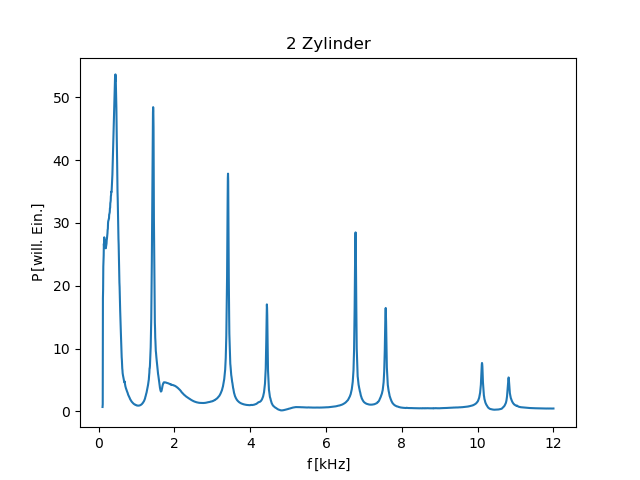

<IPython.core.display.Javascript object>


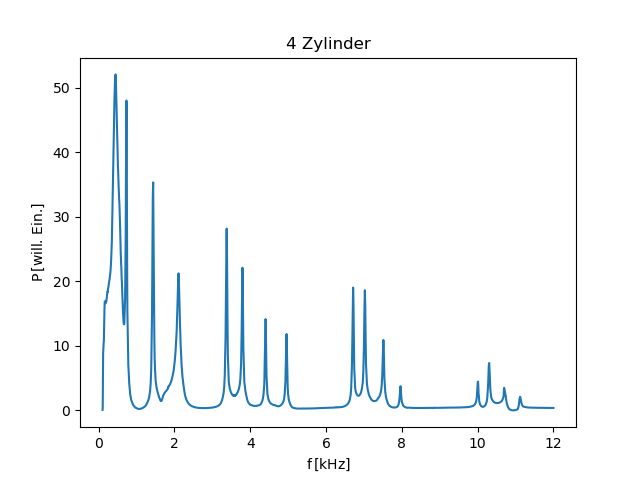

<IPython.core.display.Javascript object>


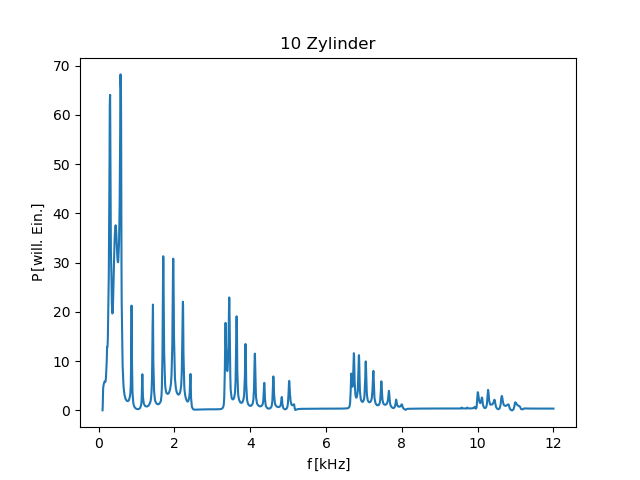

In [46]:
fig, axs = plt.subplots(1, 1)
axs.set_title("2 Zylinder")
axs.plot(f_2_zyli*10**(-3), p_2_zyli, "-", label="2 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_2_Zylinder_16mm.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("4 Zylinder")
axs.plot(f_4_zyli*10**(-3), p_4_zyli, "-", label="4 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_4_Zylinder_16mm.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("10 Zylinder")
axs.plot(f_10_zyli*10**(-3), p_10_zyli, "-", label="10 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_10_Zylinder_16mm.pdf")

Gleiche Messungen für Blenden mit Durchmessern von 10mm und 13mm

In [47]:
f_2_zyli, p_2_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_2/2_zylinder_10mm.dat", unpack=True)
f_4_zyli, p_4_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_2/4_zylinder_10mm.dat", unpack=True)
f_10_zyli, p_10_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_2/10_zylinder_10mm.dat", unpack=True)

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


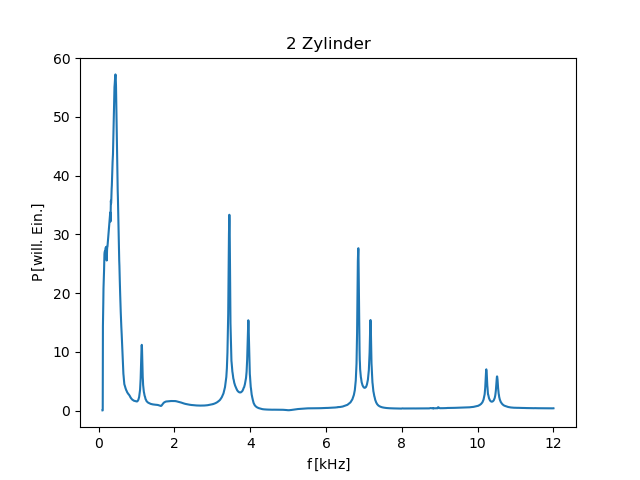

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


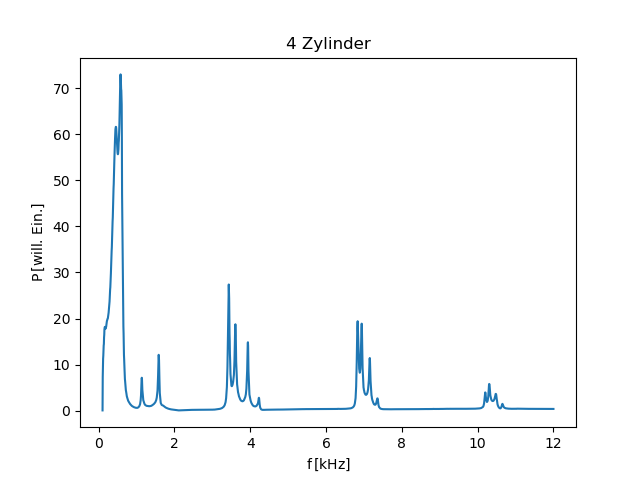

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


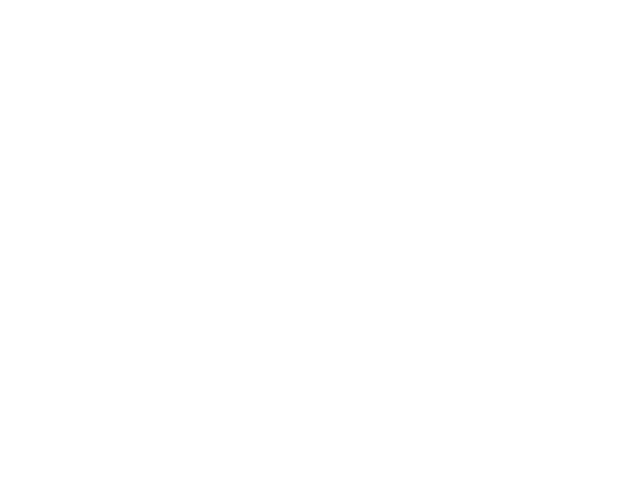

In [48]:
fig, axs = plt.subplots(1, 1)
axs.set_title("2 Zylinder")
axs.plot(f_2_zyli*10**(-3), p_2_zyli, "-", label="2 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_2_Zylinder_10mm.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("4 Zylinder")
axs.plot(f_4_zyli*10**(-3), p_4_zyli, "-", label="4 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_4_Zylinder_10mm.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("10 Zylinder")
axs.plot(f_10_zyli*10**(-3), p_10_zyli, "-", label="10 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_10_Zylinder_10mm.pdf")

plt.clf()

In [30]:
f_2_zyli, p_2_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_2/2_zylinder_13mm.dat", unpack=True)
f_4_zyli, p_4_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_2/4_zylinder_13mm.dat", unpack=True)
f_10_zyli, p_10_zyli = np.genfromtxt("1dim_festkoerper/Aufgabe_2/10_zylinder_13mm.dat", unpack=True)

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


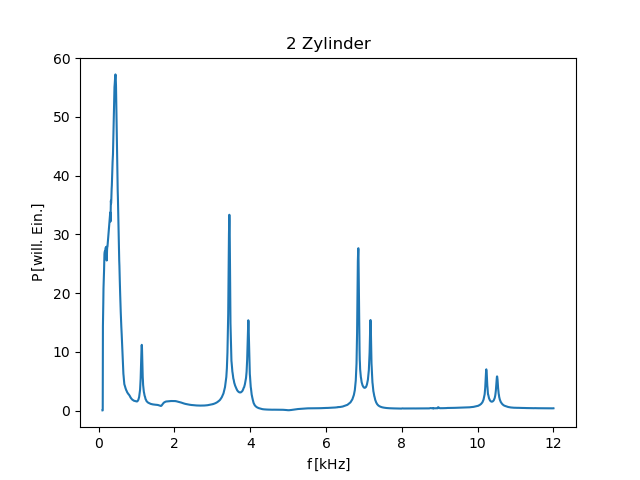

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


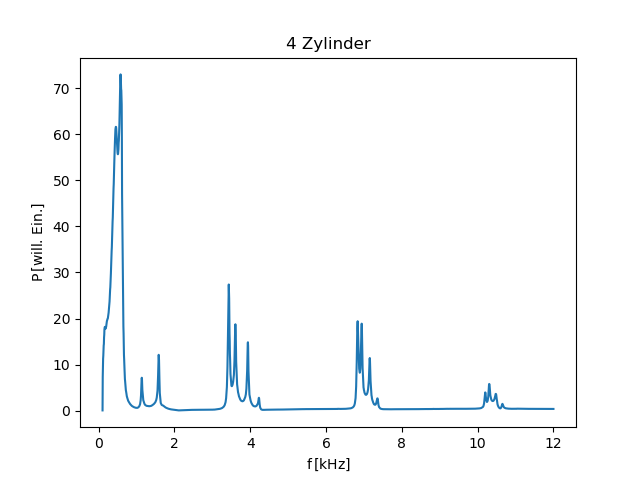

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


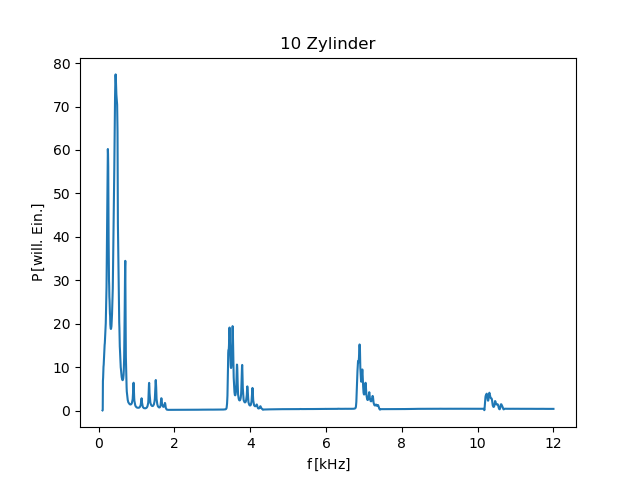

In [49]:
fig, axs = plt.subplots(1, 1)
axs.set_title("2 Zylinder")
axs.plot(f_2_zyli*10**(-3), p_2_zyli, "-", label="2 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_2_Zylinder_13mm.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("4 Zylinder")
axs.plot(f_4_zyli*10**(-3), p_4_zyli, "-", label="4 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_4_Zylinder_13mm.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("10 Zylinder")
axs.plot(f_10_zyli*10**(-3), p_10_zyli, "-", label="10 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_10_Zylinder_13mm.pdf")

Aufgabe 3: Störstellen in Form eines 37,5mm , 62,5mm und 75mm

In [50]:
f_10_zyli_375_stoer, p_10_zyli_375_stoer = np.genfromtxt("1dim_festkoerper/Aufgabe_3/10_zylinder_16mm_375mm_fehlstelle.dat", unpack=True)
f_10_zyli_625_stoer, p_10_zyli_625_stoer = np.genfromtxt("1dim_festkoerper/Aufgabe_3/10_zylinder_16mm_625mm_fehlstelle.dat", unpack=True)
f_10_zyli_750_stoer, p_10_zyli_750_stoer = np.genfromtxt("1dim_festkoerper/Aufgabe_3/10_zylinder_16mm_75mm_fehlstelle.dat", unpack=True)

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


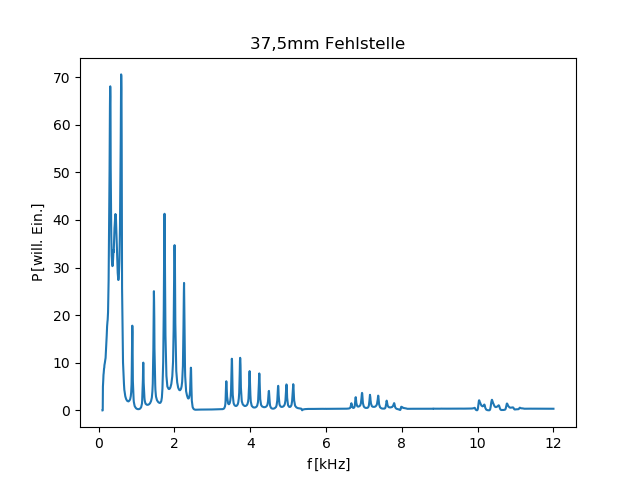

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


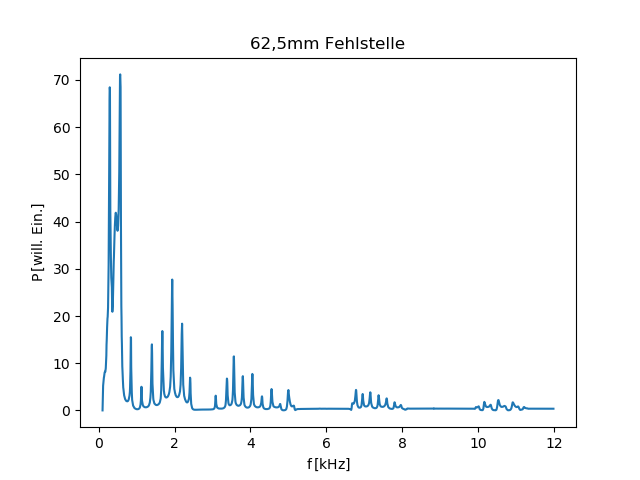

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


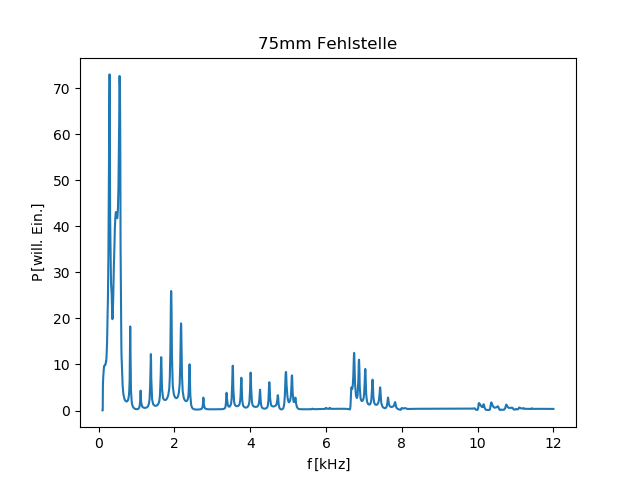

In [51]:
fig, axs = plt.subplots(1, 1)
axs.set_title("37,5mm Fehlstelle")
axs.plot(f_10_zyli_375_stoer*10**(-3), p_10_zyli_375_stoer, "-", label="37,5mm Fehlstelle")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_10_Zylinder_375_Fehlstelle.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("62,5mm Fehlstelle")
axs.plot(f_10_zyli_625_stoer*10**(-3), p_10_zyli_625_stoer, "-", label="4 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_10_Zylinder_625_Fehlstelle.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("75mm Fehlstelle")
axs.plot(f_10_zyli_750_stoer*10**(-3), p_10_zyli_750_stoer, "-", label="10 Zylinder")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_10_Zylinder_750_Fehlstelle.pdf")

10 Zylinder: Abwechselnd 50mm;75mm getrennt durch 16mm Blenden

In [52]:
f_10_zyli_50_75, p_10_zyli_50_75 = np.genfromtxt("1dim_festkoerper/Aufgabe_4/10_zylinder_16mm_abwechselnd_75_50.dat", unpack=True)
f_1_zyli_50, p_1_zyli_50 = np.genfromtxt("1dim_festkoerper/Aufgabe_4/50mm.dat", unpack=True)
f_1_zyli_75, p_1_zyli_75 = np.genfromtxt("1dim_festkoerper/Aufgabe_4/75mm.dat", unpack=True)

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


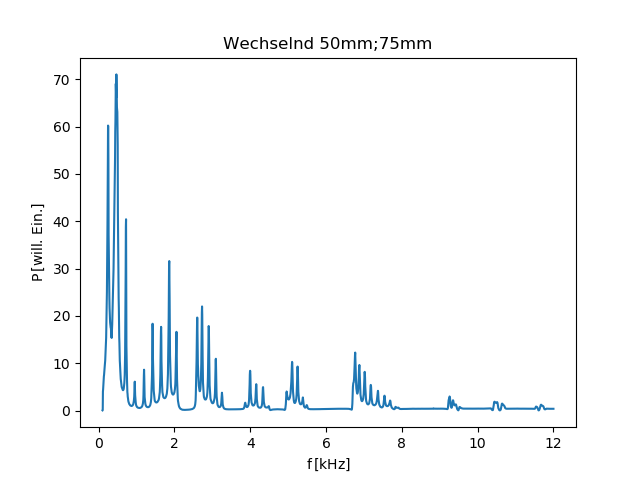

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


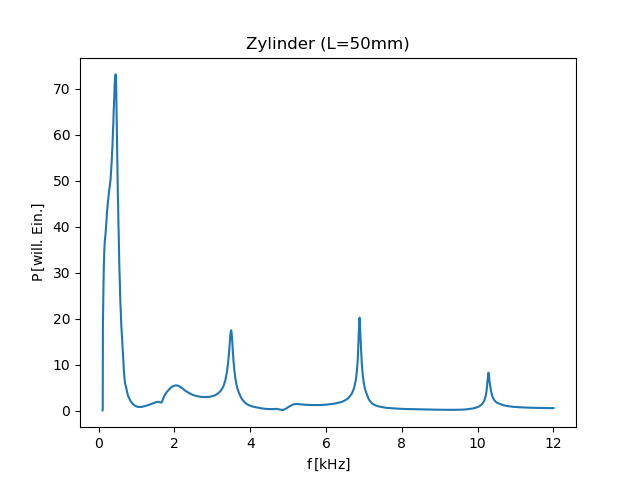

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


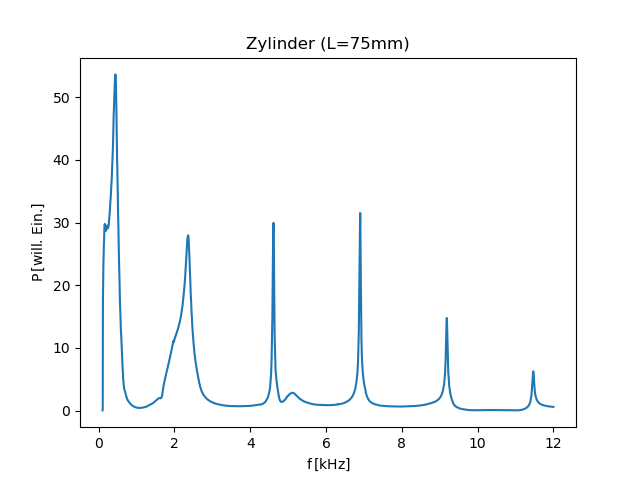

In [53]:
fig, axs = plt.subplots(1, 1)
axs.set_title("Wechselnd 50mm;75mm")
axs.plot(f_10_zyli_50_75*10**(-3), p_10_zyli_50_75, "-", label="wechselnd 50 75")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_10_Zylinder_wechselnd_50_75.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("Zylinder (L=50mm)")
axs.plot(f_1_zyli_50*10**(-3), p_1_zyli_50, "-", label="1 Zyli 50mm")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_1_Zylinder_50mm.pdf")



fig, axs = plt.subplots(1, 1)
axs.set_title("Zylinder (L=75mm)")
axs.plot(f_1_zyli_75*10**(-3), p_1_zyli_75, "-", label="1 Zyli 75mm")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_1_Zylinder_75mm.pdf")

8 Zylinder (L=50mm); Abwechselnd 16mm und 13mm Blenden (7 insgesamt)

In [54]:
f_8_zyli_blende_13_16, p_8_zyli_blende_13_16 = np.genfromtxt("1dim_festkoerper/Aufgabe_5/8_zylinder_abwechselnd_16mm_13mm_50mm.dat", unpack=True)

/home/lasse/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


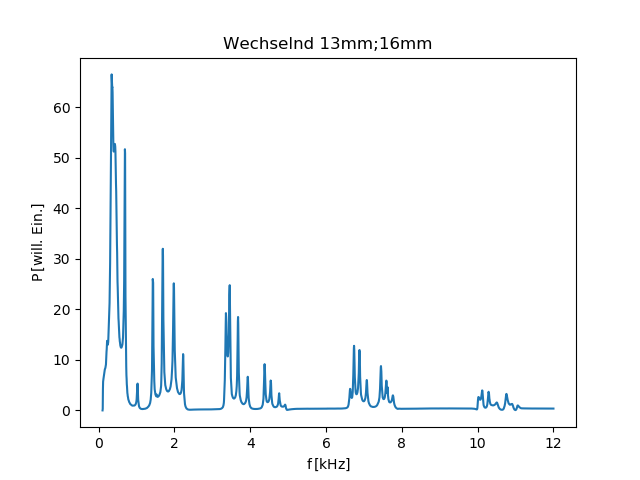

In [55]:
fig, axs = plt.subplots(1, 1)
axs.set_title("Wechselnd 13mm;16mm")
axs.plot(f_8_zyli_blende_13_16*10**(-3), p_8_zyli_blende_13_16, "-", label="wechselnd 50 75")
axs.set_xlabel(r'f$\,$[kHz]')
axs.set_ylabel(r'P$\,$[will. Ein.]')

plt.savefig("1dim_8_Zylinder_blendewechselnd_13_16.pdf")